# 1. Swedish demographic data

In [28]:
import pandas as pd

df_swe = pd.read_html(
    "https://sv.wikipedia.org/wiki/Sveriges_demografi", 
    match="Promille", 
    header=1,
)[0]
df_swe = df_swe.iloc[:-1, :-2]
df_swe.rename({"Vid utgången av år": "Year", "Folkmängd": "Population"}, axis=1, inplace=True)

df_swe


,Year,Population
0,1570,900 000
1,1650,1 225 000
2,1700,1 485 000
3,1720,1 350 000
4,1755,1 878 000
5,1815,2 465 000
6,1865,4 099 000
7,1900,5 140 000
8,2000,8 861 000
9,2020,10 379 000


In [29]:
df_swe.dtypes # strings

Year          object
Population    object
dtype: object

In [30]:
# convert year to int
df_swe["Year"] = df_swe["Year"].astype(int)

# conversion of Population to date fails because of whitespace (\xa0)
#\xa0 is treated as whitespace in the \s set
df_swe["Population"] = df_swe["Population"].replace(to_replace = "\s", value = "", regex=True).astype(int)

df_swe

,Year,Population
0,1570,900000
1,1650,1225000
2,1700,1485000
3,1720,1350000
4,1755,1878000
5,1815,2465000
6,1865,4099000
7,1900,5140000
8,2000,8861000
9,2020,10379000


In [31]:
print(f"{df_swe['Population'].mean()=}")
print(f"{df_swe['Population'].min()=}")
print(f"{df_swe['Population'].max()=}")


df_swe['Population'].mean()=3778200.0
df_swe['Population'].min()=900000
df_swe['Population'].max()=10379000


[Text(0.5, 1.0, 'Line chart of population growth Sweden'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Population')]

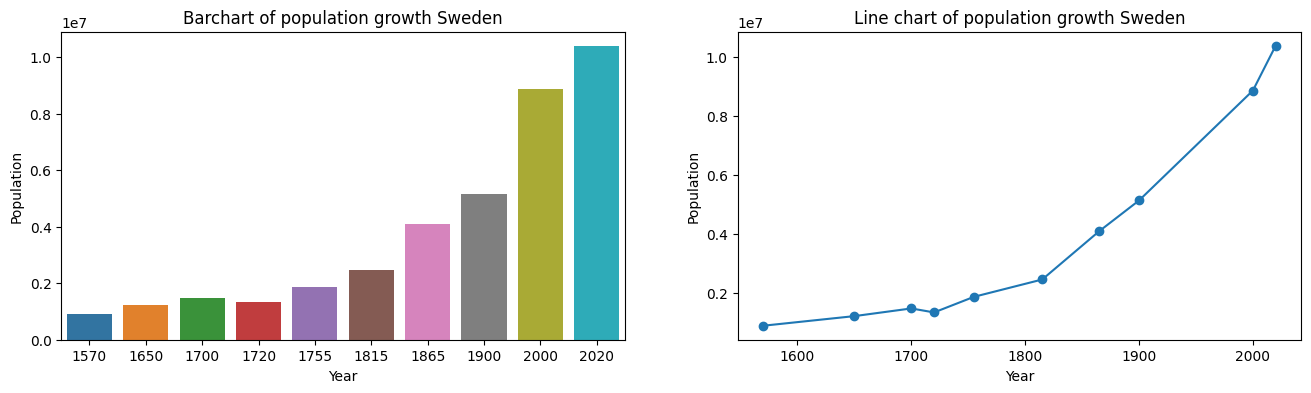

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2, figsize=(16,4))

sns.barplot(df_swe, x = "Year", y = "Population", ax=ax[0])
ax[0].set(title="Barchart of population growth Sweden")

ax[1].plot("Year", "Population", "-o", data=df_swe)
ax[1].set(title="Line chart of population growth Sweden", xlabel="Year", ylabel="Population");

In [336]:
import plotly_express as px

fig = px.line(
    df_swe,
    x = "Year",
    y = "Population",
    title = "Sweden population growth"
)

fig.update_layout(hovermode = "x")
fig.show()

In [48]:
df_swe_history = df_swe[df_swe["Year"] < 1900]
df_swe_current = df_swe.loc[df_swe["Year"] >= 1900].reset_index().drop("index", axis=1)

df_swe_current, df_swe_history

(   Year  Population
 0  1900     5140000
 1  2000     8861000
 2  2020    10379000,
    Year  Population
 0  1570      900000
 1  1650     1225000
 2  1700     1485000
 3  1720     1350000
 4  1755     1878000
 5  1815     2465000
 6  1865     4099000)

In [45]:
pd.concat([df_swe_history, df_swe_current]).reset_index().drop("index", axis=1)

,Year,Population
0,1570,900000
1,1650,1225000
2,1700,1485000
3,1720,1350000
4,1755,1878000
5,1815,2465000
6,1865,4099000
7,1900,5140000
8,2000,8861000
9,2020,10379000


In [49]:
# a bit weird to use this like this (matching on Year, Population), but works
pd.merge(df_swe_history, df_swe_current, how="outer")

,Year,Population
0,1570,900000
1,1650,1225000
2,1700,1485000
3,1720,1350000
4,1755,1878000
5,1815,2465000
6,1865,4099000
7,1900,5140000
8,2000,8861000
9,2020,10379000


# 2. Denmark demographic data

In [297]:
df_den = pd.read_html("https://da.wikipedia.org/wiki/Danmarks_demografi", match="Befolkning")[0]

df_den1 = df_den.iloc[:,:-2]
df_den1.rename({"År": "Year", "Befolkning pr. 1. januar": "Population"}, axis=1, inplace=True)
df_den2 = df_den.iloc[2:,2:]
df_den2.rename({"År.1": "Year", "Befolkning pr. 1. januar.1": "Population"}, axis=1, inplace=True)

df_den = pd.concat([df_den1, df_den2]).reset_index().drop("index", axis=1)
df_den.tail()

,Year,Population
61,2003.0,5.383.507
62,2005.0,5.411.405
63,2010.0,5.534.738
64,2015.0,5.659.715
65,2020.0,5.822.763


In [298]:
# type conversion to int
df_den["Year"] = df_den["Year"].astype(int)
df_den["Population"] = df_den["Population"].replace(r"\[5\]", "", regex=True)
df_den["Population"] = df_den["Population"].replace(r"\.", "", regex=True).astype(int)

df_den.dtypes

Year          int64
Population    int64
dtype: object

In [299]:
df_den = df_den[df_den["Year"] >= 1769]

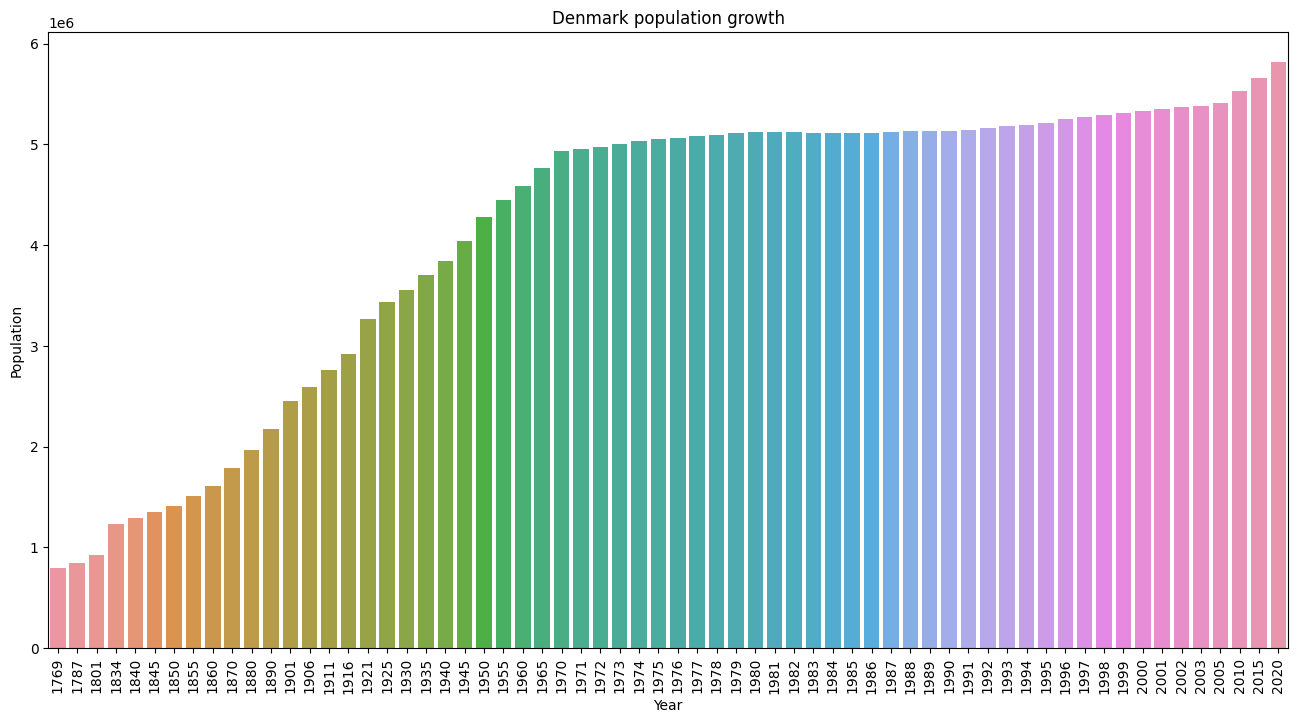

In [307]:
# plot denmarks population growth with seaborn
plt.figure(figsize=(16,8))
plt.title("Denmark population growth")
ax = sns.barplot(df_den, x = "Year", y = "Population")

# rotate year labels
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

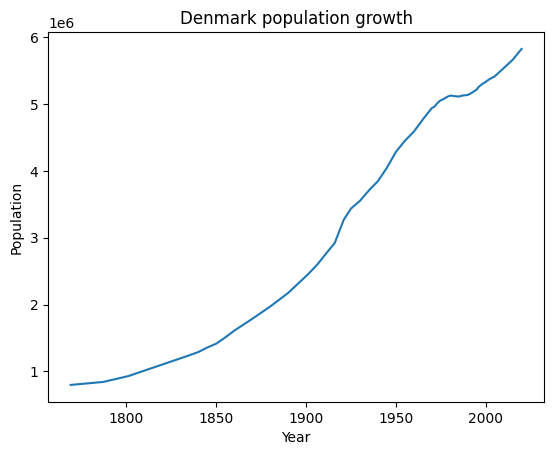

In [332]:
ax = plt.axes()
ax.plot("Year", "Population", "-", data=df_den)
ax.set(xlabel = "Year", ylabel = "Population", title = "Denmark population growth");

In [321]:
import plotly_express as px

fig = px.line(
    df_den,
    x = "Year",
    y = "Population",
    title = "Denmark population growth"
)

fig.update_layout(hovermode="x")
fig.show()

# 3. Norwegian demographic data

In [286]:
df_nor = pd.read_html(
    "https://sv.wikipedia.org/wiki/Norges_demografi", match = "fertilitet",
    decimal=",", # need to specify comma as decimal marker, otherwise not interpreted
    thousands = " " # great, can specify thousands separated by space!
    )[0]
df_nor_fertility = pd.read_html("https://en.wikipedia.org/wiki/Demographics_of_Norway", match="Total fertility rates")[0]

# only need year and fertility columns
df_nor_fertility = df_nor_fertility.iloc[:, [0,-1]]
df_nor_fertility.rename({"Unnamed: 0": "Year", "Total fertility rates[fn 1][6][9]": "Fertility"}, axis=1, inplace=True)
df_nor_fertility.tail()

,Year,Fertility
118,2018,1.56
119,2019,1.53
120,2020,1.48
121,2021,1.55
122,2022,NaN


In [287]:
df_nor.rename(
    {"Unnamed: 0": "Year", 
    "Total fertilitet": "Fertility", 
    "Befolkning i tusentals (x 1000)": "Population"},
    axis=1, inplace=True)

df_nor = df_nor.loc[:, ["Year", "Population", "Fertility"]]

# table population numbers given in 1000s
df_nor["Population"] = df_nor["Population"] * 1000

In [288]:
# check that it is same measurement of fertility from both datasets
df_nor.loc[df_nor["Year"] == 2012], df_nor_fertility.loc[df_nor_fertility["Year"] == 2012]

(     Year  Population  Fertility
 112  2012     5019000       1.85,
      Year  Fertility
 112  2012       1.85)

In [289]:
# check that all nan fertility values are found in other df
fertility_nans = df_nor[df_nor["Fertility"].isna()]["Year"]

len(fertility_nans), fertility_nans.isin(df_nor_fertility["Year"]).sum()

(28, 28)

In [294]:
# use fillna with other df
df_nor["Fertility"] = df_nor["Fertility"].fillna(df_nor_fertility["Fertility"])

In [295]:
# check that that fillna actually worked
(df_nor.loc[:27, "Fertility"] == df_nor_fertility.loc[:27, "Fertility"]).sum()

28

In [296]:
df_nor

,Year,Population,Fertility
0,1900,2231000,4.40
1,1901,2255000,4.37
2,1902,2276000,4.26
3,1903,2288000,4.16
4,1904,2298000,4.07
...,...,...,...
108,2008,4768000,1.96
109,2009,4829000,1.98
110,2010,4889000,1.95
111,2011,4953000,1.88


# 4. Merge Sweden-Norway

In [356]:
df_swe_complete = pd.read_html(
    "https://sv.wikipedia.org/wiki/Sveriges_demografi",
    match = "Naturlig",
    decimal=",",
    thousands=" "
    )[0]

df_swe_complete = df_swe_complete.iloc[:, [0,1,-1]]
df_swe_complete.rename({
    "Unnamed: 0": "Year",
    "Medel- folkmängd": "Population",
    "Total fertilitet": "Fertility"},
    axis = 1, inplace=True
    )

In [357]:
# make years line up with norway data
df_swe_complete = df_swe_complete.iloc[0: len(df_nor)]
df_swe_complete.tail()

,Year,Population,Fertility
108,2008,9219637.0,1.91
109,2009,9298514.5,1.94
110,2010,9378126.0,1.98
111,2011,9449212.5,1.90
112,2012,9519374.0,1.91


In [358]:
df_nor.tail()

,Year,Population,Fertility
108,2008,4768000,1.96
109,2009,4829000,1.98
110,2010,4889000,1.95
111,2011,4953000,1.88
112,2012,5019000,1.85


In [361]:
df_nor["Country"] = "Norway"
df_swe_complete["Country"] = "Sweden"

In [364]:
df = pd.concat([df_swe_complete, df_nor])

In [367]:
fig1 = px.line(df, x="Year", y="Fertility", color="Country")
fig1.update_layout(hovermode="x")
fig1.show()

In [368]:
fig2 = px.line(df, x = "Year", y = "Population", color = "Country")
fig2.update_layout(hovermode = "x")